In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output
import scipy.io
import os
import time

In [2]:
#Take an entire X_pos and Y_pos array, get the relative position for each X and Y.
def get_relative_positions(X_pos, Y_pos, index):
    rel_X = X_pos - np.reshape(X_pos.T[index], [X_pos.shape[0], -1])
    rel_Y = Y_pos - np.reshape(Y_pos.T[index], [Y_pos.shape[0], -1])
    #Experimental: Theoretically, the exact position of the particle should not be an indicator of its type, or even
    #play any helpful effect along with the relative positions, so we delete it from our inputs.
    rel_X = np.delete(rel_X, index, 1)
    rel_Y = np.delete(rel_Y, index, 1)  
    return rel_X, rel_Y

In [3]:
def transform_to_relative(X_pos, Y_pos, ivel):
    all_rel_X = np.array([])
    all_rel_Y = np.array([])
    labels = np.array([])
    for index in range(X_pos.shape[1]):
        rel_X, rel_Y = get_relative_positions(X_pos, Y_pos, index)
        labels = np.append(labels, np.repeat(ivel[index], X_pos.shape[0]))
        labels = np.append(labels, np.repeat(-ivel[index], X_pos.shape[0]))
        all_rel_X = np.reshape(np.append(all_rel_X, rel_X), [-1, rel_X.shape[1]])
        all_rel_X = np.reshape(np.append(all_rel_X, -rel_X), [-1, rel_X.shape[1]])
        all_rel_Y = np.reshape(np.append(all_rel_Y, rel_Y), [-1, rel_Y.shape[1]])
        all_rel_Y = np.reshape(np.append(all_rel_Y, rel_Y), [-1, rel_Y.shape[1]])
    all_rel_pos = np.concatenate([all_rel_X, all_rel_Y], axis = 1)
    labels = np.reshape(labels, [all_rel_pos.shape[0], 1])
    return all_rel_pos, labels

In [4]:
folder = np.array(os.listdir('CoPhe_Lab/1st_May'))
folder = folder[np.random.permutation(len(folder))]
folder_name = "Cophe_Lab\\1st_May\\"

In [5]:
file = scipy.io.loadmat(folder_name + folder[0])
all_Xpos = np.array(file['XA']).T
all_Ypos = np.array(file['YA']).T

In [6]:
start = time.time()

#Get the list of all files in the specified folder, and shuffle them to generalize:
folder = np.array(os.listdir('CoPhe_Lab/1st_May'))
folder = folder[np.random.permutation(len(folder))]
folder_name = "Cophe_Lab\\1st_May\\"

#Specify number of files to process:
file_num = 20
print("Files to process = ", file_num)
_ = input("Press Enter to continue")

file = scipy.io.loadmat(folder_name + folder[0])

#Initialize the array for the XA and YA positions, shuffle and extract 10 random positions
all_Xpos = np.array(file['XA']).T
all_Ypos = np.array(file['YA']).T
perm = np.random.permutation(len(all_Xpos))
all_Xpos = all_Xpos[perm[:10]]
all_Ypos = all_Ypos[perm[:10]]

#Get the Velocities along X-direction for current file:
VXA = file['VXA']

#Extract the first timestep, the initial velocity, and divide it by its magnitude to get the direction (1 or -1)
ivel = (VXA[:, 0]/abs(VXA[0, 0]))
# = ((ivel + 1)/2).astype('int')

X, Y = transform_to_relative(all_Xpos, all_Ypos, ivel)

processed = 1

for i in range(1, file_num):
    
    file = scipy.io.loadmat(folder_name + folder[0])

    #Initialize the array for the XA and YA positions
    all_Xpos = np.array(file['XA']).T
    all_Ypos = np.array(file['YA']).T
    perm = np.random.permutation(len(all_Xpos))
    all_Xpos = all_Xpos[perm[:10]]
    all_Ypos = all_Ypos[perm[:10]]

    #Get the Velocities along X-direction for current file:
    VXA = file['VXA']

    #Extract the first timestep, the initial velocity, and divide it by its magnitude to get the direction (1 or -1)
    ivel = (VXA[:, 0]/abs(VXA[0, 0]))
    #ivel = ((ivel + 1)/2).astype('int')

    X_curr, Y_curr = transform_to_relative(all_Xpos, all_Ypos, ivel)
    
    X = np.concatenate((X, X_curr), axis = 0)
    Y = np.concatenate((Y, Y_curr), axis = 0)
    
    processed += 1
    print("Files read = ", processed)
    clear_output(wait=True)

print(time.time() - start)
    
print(X.shape, Y.shape)

3.289301633834839
(16800, 82) (16800, 1)


In [19]:
def read_data(folder_name, folder, no_of_timesteps, file_num, start_num): 
    
    file = scipy.io.loadmat(folder_name + folder[start_num])

    #Initialize the array for the XA and YA positions, shuffle and extract 10 random positions
    all_Xpos = np.array(file['XA']).T
    all_Ypos = np.array(file['YA']).T
    perm = np.random.permutation(len(all_Xpos))
    all_Xpos = all_Xpos[perm[:no_of_timesteps]]
    all_Ypos = all_Ypos[perm[:no_of_timesteps]]

    #Get the Velocities along X-direction for current file:
    VXA = file['VXA']

    #Extract the first timestep, the initial velocity, and divide it by its magnitude to get the direction (1 or -1)
    ivel = (VXA[:, 0]/abs(VXA[0, 0]))
    # = ((ivel + 1)/2).astype('int')

    X, Y = transform_to_relative(all_Xpos, all_Ypos, ivel)

    processed = 1

    for i in range(start_num + 1, start_num + file_num):

        file = scipy.io.loadmat(folder_name + folder[0])

        #Initialize the array for the XA and YA positions
        all_Xpos = np.array(file['XA']).T
        all_Ypos = np.array(file['YA']).T
        perm = np.random.permutation(len(all_Xpos))
        all_Xpos = all_Xpos[perm[:no_of_timesteps]]
        all_Ypos = all_Ypos[perm[:no_of_timesteps]]

        #Get the Velocities along X-direction for current file:
        VXA = file['VXA']

        #Extract the first timestep, the initial velocity, and divide it by its magnitude to get the direction (1 or -1)
        ivel = (VXA[:, 0]/abs(VXA[0, 0]))
        #ivel = ((ivel + 1)/2).astype('int')

        X_curr, Y_curr = transform_to_relative(all_Xpos, all_Ypos, ivel)

        X = np.concatenate((X, X_curr), axis = 0)
        Y = np.concatenate((Y, Y_curr), axis = 0)

        processed += 1
        print("Files read = ", processed)
        clear_output(wait=True)
        
    return X, Y

In [20]:
layer_nodes = [20, 60, 80, 60, 1]
#layer_nodes = [20, 30, 40, 50, 60, 70, 80, 70, 60, 50, 40, 30, 20, 1] # 13 layers
dropout_probs = [0, 0.1, 0.1, 0.1, 0] #0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0]

#Activations:
sigmoid = tf.keras.activations.sigmoid
relu = tf.keras.activations.relu
tanh = tf.keras.activations.tanh

activations = [tanh, tanh, tanh, tanh, tanh, tanh, tanh] #, tanh, tanh, tanh, tanh, tanh, tanh, tanh, tanh, tanh]
inputs = tf.keras.layers.Input(shape = (82,))
layer_output = tf.keras.layers.Dense(units = layer_nodes[0], activation = 'tanh')(inputs)
layer_output = tf.keras.layers.Dropout(dropout_probs[0])(layer_output)
layer_output = tf.keras.layers.BatchNormalization()(layer_output)

for i in range(1, len(layer_nodes)-1):
    layer_output = tf.keras.layers.Dense(units = layer_nodes[i], activation = activations[i])(layer_output)
    layer_output = tf.keras.layers.Dropout(dropout_probs[i])(layer_output)
    layer_output = tf.keras.layers.BatchNormalization()(layer_output)
    
layer_output = tf.keras.layers.Dense(units = layer_nodes[-1], activation = activations[-1])(layer_output)

In [21]:
relative_model = tf.keras.Model(inputs = inputs, outputs = layer_output)
relative_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 82)]              0         
                                                                 
 dense_5 (Dense)             (None, 20)                1660      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 60)                1260      
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                           

In [23]:
relative_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = 'mean_squared_error',
             metrics = [tf.keras.metrics.Accuracy()])

In [17]:
time.sleep(60)

In [ ]:
file_num = 200
full_history = []
for i in range(len(folder)//file_num):
    X, Y = read_data(folder_name, folder, 20, file_num, i*file_num)
    history = relative_model.fit(x = X, y = Y, batch_size = 168000, epochs = 3000)
    full_history = np.append(full_history, history.history['accuracy'])
    clear_output()
    print("Cooling down for next training run")
    time.sleep(240)

Epoch 1/3000
2/2 [==============================] - 0s 70ms/step - loss: 0.0016 - accuracy: 5.9524e-06
Epoch 2/3000
2/2 [==============================] - 0s 63ms/step - loss: 0.0016 - accuracy: 5.9524e-06
Epoch 3/3000
2/2 [==============================] - 0s 64ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 4/3000
2/2 [==============================] - 0s 64ms/step - loss: 0.0015 - accuracy: 5.9524e-06
Epoch 5/3000
2/2 [==============================] - 0s 64ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 6/3000
2/2 [==============================] - 0s 64ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 7/3000
2/2 [==============================] - 0s 63ms/step - loss: 0.0015 - accuracy: 2.9762e-06
Epoch 8/3000
2/2 [==============================] - 0s 65ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 9/3000
2/2 [==============================] - 0s 65ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 10/3000
2/2 [==============================] - 0s 64ms/step - loss:

2/2 [==============================] - 0s 65ms/step - loss: 1.6594e-04 - accuracy: 0.0000e+00
Epoch 78/3000
2/2 [==============================] - 0s 64ms/step - loss: 1.6482e-04 - accuracy: 0.0000e+00
Epoch 79/3000
2/2 [==============================] - 0s 65ms/step - loss: 1.5604e-04 - accuracy: 0.0000e+00
Epoch 80/3000
2/2 [==============================] - 0s 66ms/step - loss: 1.4048e-04 - accuracy: 0.0000e+00
Epoch 81/3000
2/2 [==============================] - 0s 65ms/step - loss: 1.1415e-04 - accuracy: 0.0000e+00
Epoch 82/3000
2/2 [==============================] - 0s 64ms/step - loss: 1.0621e-04 - accuracy: 0.0000e+00
Epoch 83/3000
2/2 [==============================] - 0s 64ms/step - loss: 1.0583e-04 - accuracy: 0.0000e+00
Epoch 84/3000
2/2 [==============================] - 0s 65ms/step - loss: 1.0946e-04 - accuracy: 0.0000e+00
Epoch 85/3000
2/2 [==============================] - 0s 64ms/step - loss: 1.0639e-04 - accuracy: 0.0000e+00
Epoch 86/3000
2/2 [=======================

2/2 [==============================] - 0s 64ms/step - loss: 8.3357e-05 - accuracy: 0.0000e+00
Epoch 153/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3378e-05 - accuracy: 0.0000e+00
Epoch 154/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3420e-05 - accuracy: 0.0000e+00
Epoch 155/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3315e-05 - accuracy: 0.0000e+00
Epoch 156/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3794e-05 - accuracy: 0.0000e+00
Epoch 157/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3350e-05 - accuracy: 0.0000e+00
Epoch 158/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3399e-05 - accuracy: 0.0000e+00
Epoch 159/3000
2/2 [==============================] - 0s 62ms/step - loss: 8.3394e-05 - accuracy: 0.0000e+00
Epoch 160/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3354e-05 - accuracy: 0.0000e+00
Epoch 161/3000
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 8.3341e-05 - accuracy: 0.0000e+00
Epoch 228/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3830e-05 - accuracy: 0.0000e+00
Epoch 229/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3358e-05 - accuracy: 0.0000e+00
Epoch 230/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3350e-05 - accuracy: 0.0000e+00
Epoch 231/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3352e-05 - accuracy: 0.0000e+00
Epoch 232/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3374e-05 - accuracy: 0.0000e+00
Epoch 233/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3379e-05 - accuracy: 0.0000e+00
Epoch 234/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3372e-05 - accuracy: 0.0000e+00
Epoch 235/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3313e-05 - accuracy: 0.0000e+00
Epoch 236/3000
2/2 [==============

2/2 [==============================] - 0s 65ms/step - loss: 8.3340e-05 - accuracy: 0.0000e+00
Epoch 303/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3345e-05 - accuracy: 0.0000e+00
Epoch 304/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3398e-05 - accuracy: 0.0000e+00
Epoch 305/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3356e-05 - accuracy: 0.0000e+00
Epoch 306/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3332e-05 - accuracy: 0.0000e+00
Epoch 307/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3362e-05 - accuracy: 0.0000e+00
Epoch 308/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3363e-05 - accuracy: 0.0000e+00
Epoch 309/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3373e-05 - accuracy: 0.0000e+00
Epoch 310/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3852e-05 - accuracy: 0.0000e+00
Epoch 311/3000
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 8.3318e-05 - accuracy: 0.0000e+00
Epoch 378/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3323e-05 - accuracy: 0.0000e+00
Epoch 379/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3356e-05 - accuracy: 0.0000e+00
Epoch 380/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3349e-05 - accuracy: 0.0000e+00
Epoch 381/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3361e-05 - accuracy: 0.0000e+00
Epoch 382/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3329e-05 - accuracy: 0.0000e+00
Epoch 383/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3345e-05 - accuracy: 0.0000e+00
Epoch 384/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3345e-05 - accuracy: 0.0000e+00
Epoch 385/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3330e-05 - accuracy: 0.0000e+00
Epoch 386/3000
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 8.3330e-05 - accuracy: 0.0000e+00
Epoch 453/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3338e-05 - accuracy: 0.0000e+00
Epoch 454/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3331e-05 - accuracy: 0.0000e+00
Epoch 455/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3327e-05 - accuracy: 0.0000e+00
Epoch 456/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3269e-05 - accuracy: 0.0000e+00
Epoch 457/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3344e-05 - accuracy: 0.0000e+00
Epoch 458/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3318e-05 - accuracy: 0.0000e+00
Epoch 459/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3327e-05 - accuracy: 0.0000e+00
Epoch 460/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3372e-05 - accuracy: 0.0000e+00
Epoch 461/3000
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 8.3324e-05 - accuracy: 0.0000e+00
Epoch 528/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3342e-05 - accuracy: 0.0000e+00
Epoch 529/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3345e-05 - accuracy: 0.0000e+00
Epoch 530/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3345e-05 - accuracy: 0.0000e+00
Epoch 531/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3326e-05 - accuracy: 0.0000e+00
Epoch 532/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3353e-05 - accuracy: 0.0000e+00
Epoch 533/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3298e-05 - accuracy: 0.0000e+00
Epoch 534/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3399e-05 - accuracy: 0.0000e+00
Epoch 535/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3349e-05 - accuracy: 0.0000e+00
Epoch 536/3000
2/2 [==============

2/2 [==============================] - 0s 65ms/step - loss: 8.3358e-05 - accuracy: 0.0000e+00
Epoch 603/3000
2/2 [==============================] - 0s 63ms/step - loss: 8.3334e-05 - accuracy: 0.0000e+00
Epoch 604/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3330e-05 - accuracy: 0.0000e+00
Epoch 605/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3322e-05 - accuracy: 0.0000e+00
Epoch 606/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3325e-05 - accuracy: 0.0000e+00
Epoch 607/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3325e-05 - accuracy: 0.0000e+00
Epoch 608/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3249e-05 - accuracy: 0.0000e+00
Epoch 609/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3329e-05 - accuracy: 0.0000e+00
Epoch 610/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3323e-05 - accuracy: 0.0000e+00
Epoch 611/3000
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 8.3324e-05 - accuracy: 0.0000e+00
Epoch 678/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3326e-05 - accuracy: 0.0000e+00
Epoch 679/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3329e-05 - accuracy: 0.0000e+00
Epoch 680/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3255e-05 - accuracy: 0.0000e+00
Epoch 681/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3342e-05 - accuracy: 0.0000e+00
Epoch 682/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3394e-05 - accuracy: 0.0000e+00
Epoch 683/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3368e-05 - accuracy: 0.0000e+00
Epoch 684/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3333e-05 - accuracy: 0.0000e+00
Epoch 685/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3341e-05 - accuracy: 0.0000e+00
Epoch 686/3000
2/2 [==============

2/2 [==============================] - 0s 66ms/step - loss: 8.3330e-05 - accuracy: 0.0000e+00
Epoch 753/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3347e-05 - accuracy: 0.0000e+00
Epoch 754/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3373e-05 - accuracy: 0.0000e+00
Epoch 755/3000
2/2 [==============================] - 0s 64ms/step - loss: 8.3343e-05 - accuracy: 0.0000e+00
Epoch 756/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3337e-05 - accuracy: 0.0000e+00
Epoch 757/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3486e-05 - accuracy: 0.0000e+00
Epoch 758/3000
2/2 [==============================] - 0s 66ms/step - loss: 8.3338e-05 - accuracy: 0.0000e+00
Epoch 759/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3320e-05 - accuracy: 0.0000e+00
Epoch 760/3000
2/2 [==============================] - 0s 65ms/step - loss: 8.3325e-05 - accuracy: 0.0000e+00
Epoch 761/3000
2/2 [==============

In [10]:
history = relative_model.fit(x = X, y = Y, batch_size = 168000, epochs = 5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 1.4623 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 88ms/step - loss: 0.8149 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 69ms/step - loss: 0.4369 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 60ms/step - loss: 0.2597 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 64ms/step - loss: 0.1848 - accuracy: 0.0000e+00


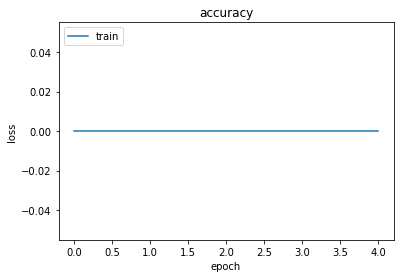

In [11]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
history.history['accuracy']

[0.0, 0.0, 0.0, 0.0, 0.0]

In [103]:
relative_model.save('relative_model5_87acc.h5')

array([1.])

In [96]:
i = 345
print(Y[i])
relative_model.predict(X[i].reshape((1, -1)))

[1.]


array([[1.]], dtype=float32)